<a href="https://colab.research.google.com/github/ZeeeeCS/Sales-Forcasting-For-retail-store/blob/main/ThirdSalesForcasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Upload Kaggle API Key
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"amscientist","key":"033eda4bde2d7486d7d07bf9f10f1cc5"}'}

In [ ]:

import os
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download anirudhchauhan/retail-store-inventory-forecasting-dataset


Dataset URL: https://www.kaggle.com/datasets/anirudhchauhan/retail-store-inventory-forecasting-dataset
License(s): CC0-1.0
  0% 0.00/1.51M [00:00<?, ?B/s]
100% 1.51M/1.51M [00:00<00:00, 110MB/s]


In [ ]:
# Unzip Dataset
!unzip retail-store-inventory-forecasting-dataset.zip

Archive:  retail-store-inventory-forecasting-dataset.zip
  inflating: retail_store_inventory.csv  


In [ ]:
# Load Data
data_sales=pd.read_csv('/content/retail_store_inventory.csv')

In [ ]:
data_sales.head(10)

,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Weather Condition,Holiday/Promotion,Competitor Pricing,Seasonality
0,2022-01-01,S001,P0001,Groceries,North,231,127,55,135.47,33.50,20,Rainy,0,29.69,Autumn
1,2022-01-01,S001,P0002,Toys,South,204,150,66,144.04,63.01,20,Sunny,0,66.16,Autumn
2,2022-01-01,S001,P0003,Toys,West,102,65,51,74.02,27.99,10,Sunny,1,31.32,Summer
3,2022-01-01,S001,P0004,Toys,North,469,61,164,62.18,32.72,10,Cloudy,1,34.74,Autumn
4,2022-01-01,S001,P0005,Electronics,East,166,14,135,9.26,73.64,0,Sunny,0,68.95,Summer
5,2022-01-01,S001,P0006,Groceries,South,138,128,102,139.82,76.83,10,Sunny,1,79.35,Winter
6,2022-01-01,S001,P0007,Furniture,East,359,97,167,108.92,34.16,10,Rainy,1,36.55,Winter
7,2022-01-01,S001,P0008,Clothing,North,380,312,54,329.73,97.99,5,Cloudy,0,100.09,Spring
8,2022-01-01,S001,P0009,Electronics,West,183,175,135,174.15,20.74,10,Cloudy,0,17.66,Autumn
9,2022-01-01,S001,P0010,Toys,South,108,28,196,24.47,59.99,0,Rainy,1,61.21,Winter


In [ ]:
data_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73100 entries, 0 to 73099
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                73100 non-null  object 
 1   Store ID            73100 non-null  object 
 2   Product ID          73100 non-null  object 
 3   Category            73100 non-null  object 
 4   Region              73100 non-null  object 
 5   Inventory Level     73100 non-null  int64  
 6   Units Sold          73100 non-null  int64  
 7   Units Ordered       73100 non-null  int64  
 8   Demand Forecast     73100 non-null  float64
 9   Price               73100 non-null  float64
 10  Discount            73100 non-null  int64  
 11  Weather Condition   73100 non-null  object 
 12  Holiday/Promotion   73100 non-null  int64  
 13  Competitor Pricing  73100 non-null  float64
 14  Seasonality         73100 non-null  object 
dtypes: float64(3), int64(5), object(7)
memory usage: 8.4+

In [ ]:
data_sales.shape

(73100, 15)

In [ ]:
# Convert Categorical Columns
data_sales[['Region','Category','Seasonality','Weather Condition']]=data_sales[['Region','Category','Seasonality','Weather Condition']].astype('category')

In [ ]:
data_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73100 entries, 0 to 73099
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Date                73100 non-null  object  
 1   Store ID            73100 non-null  object  
 2   Product ID          73100 non-null  object  
 3   Category            73100 non-null  category
 4   Region              73100 non-null  category
 5   Inventory Level     73100 non-null  int64   
 6   Units Sold          73100 non-null  int64   
 7   Units Ordered       73100 non-null  int64   
 8   Demand Forecast     73100 non-null  float64 
 9   Price               73100 non-null  float64 
 10  Discount            73100 non-null  int64   
 11  Weather Condition   73100 non-null  category
 12  Holiday/Promotion   73100 non-null  int64   
 13  Competitor Pricing  73100 non-null  float64 
 14  Seasonality         73100 non-null  category
dtypes: category(4), float64(3), int64(5)

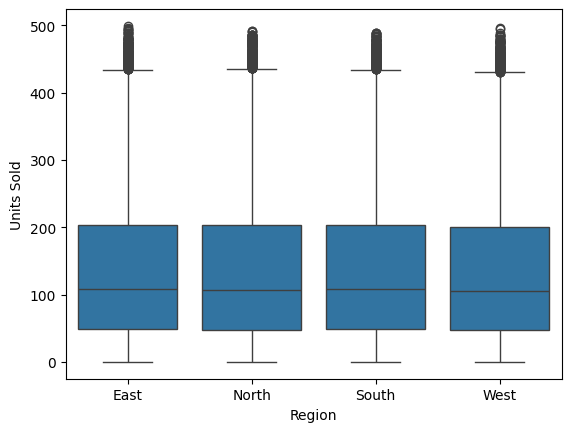

In [ ]:
# Boxplots the distribution of 'Units Sold' by Region
sns.boxplot(data=data_sales,x='Region',y='Units Sold')
plt.show()

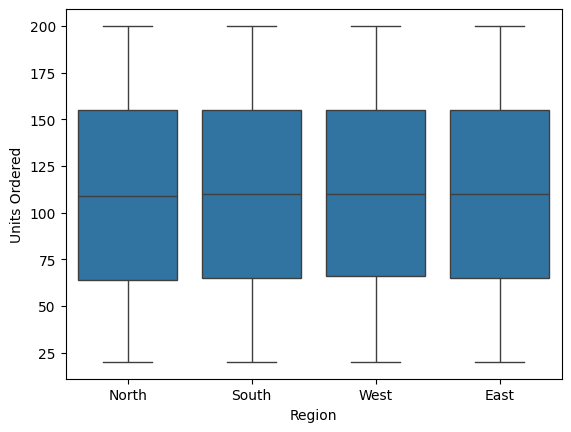

In [ ]:
# Boxplots the distribution of 'Units Ordered' by Region
sns.boxplot(data=data_sales,x='Region',y='Units Ordered')
plt.show()

In [ ]:
# Check for Missing Values
data_sales.isnull().sum()

,0
Date,0
Store ID,0
Product ID,0
Category,0
Region,0
Inventory Level,0
Units Sold,0
Units Ordered,0
Demand Forecast,0
Price,0


In [ ]:
# Descriptive Statistics
data_sales.describe()

,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Holiday/Promotion,Competitor Pricing
count,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000
mean,274.469877,136.464870,110.004473,141.494720,55.135108,10.009508,0.497305,55.146077
std,129.949514,108.919406,52.277448,109.254076,26.021945,7.083746,0.499996,26.191408
min,50.000000,0.000000,20.000000,-9.990000,10.000000,0.000000,0.000000,5.030000
25%,162.000000,49.000000,65.000000,53.670000,32.650000,5.000000,0.000000,32.680000
50%,273.000000,107.000000,110.000000,113.015000,55.050000,10.000000,0.000000,55.010000
75%,387.000000,203.000000,155.000000,208.052500,77.860000,15.000000,1.000000,77.820000
max,500.000000,499.000000,200.000000,518.550000,100.000000,20.000000,1.000000,104.940000


In [ ]:
# Correlation Analysis
corrlation=data_sales.copy()
corrlation.drop(columns=['Date','Store ID','Product ID'],inplace=True)

for col in ['Region','Category','Seasonality','Weather Condition']:
    corrlation[col]=corrlation[col].astype('category').cat.codes

corrlation.corr()

,Category,Region,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Weather Condition,Holiday/Promotion,Competitor Pricing,Seasonality
Category,1.000000,0.000841,0.001439,0.000512,-0.001686,0.000495,0.001375,-0.001784,-0.000624,-0.000864,0.000947,-0.001474
Region,0.000841,1.000000,-0.006837,-0.003109,0.003172,-0.002467,-0.003576,-0.002696,0.000209,-0.001074,-0.003389,-0.000785
Inventory Level,0.001439,-0.006837,1.000000,0.589995,0.001060,0.588561,0.009140,0.004889,0.001898,0.003411,0.009365,-0.003425
Units Sold,0.000512,-0.003109,0.589995,1.000000,-0.000930,0.996853,0.001082,0.002576,0.004688,-0.000374,0.001259,-0.003324
Units Ordered,-0.001686,0.003172,0.001060,-0.000930,1.000000,-0.001102,0.004212,-0.000938,-0.001064,0.005446,0.004596,0.003492
Demand Forecast,0.000495,-0.002467,0.588561,0.996853,-0.001102,1.000000,0.000675,0.002338,0.004768,-0.000526,0.000844,-0.003109
Price,0.001375,-0.003576,0.009140,0.001082,0.004212,0.000675,1.000000,0.001509,-0.007715,0.002309,0.993900,0.005095
Discount,-0.001784,-0.002696,0.004889,0.002576,-0.000938,0.002338,0.001509,1.000000,-0.002302,-0.000852,0.001958,-0.004622
Weather Condition,-0.000624,0.000209,0.001898,0.004688,-0.001064,0.004768,-0.007715,-0.002302,1.000000,-0.002408,-0.007440,0.003646
Holiday/Promotion,-0.000864,-0.001074,0.003411,-0.000374,0.005446,-0.000526,0.002309,-0.000852,-0.002408,1.000000,0.001890,-0.001081


In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(corrlation.corr(),annot=False,cmap='coolwarm',linewidths=0.5, fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

NameError: name 'plt' is not defined

In [ ]:
# Convert 'Date' column to datetime format
data_sales['Date'] = pd.to_datetime(data_sales['Date'])

# Now filter the correct date range
filtered_data = data_sales[(data_sales['Date'] >= '2022-01-01') & (data_sales['Date'] <= '2022-12-31')]

plt.figure(figsize=(12, 6))
sns.lineplot(data=filtered_data, x='Date', y='Units Sold')

plt.title('Units Sold Over Time (2022)')
plt.xlabel('Date')
plt.ylabel('Units Sold')

import matplotlib.dates as mdates

plt.gca().xaxis.set_major_locator(mdates.MonthLocator())  # Show one label per month
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))  # Format as "Jan 2022"

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(data=data_sales, x='Units Sold', bins=30, kde=True)
plt.title('Distribution of Units Sold')
plt.xlabel('Units Sold')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Extract day of the week from the Date column
data_sales['DayOfWeek'] = pd.to_datetime(data_sales['Date']).dt.day_name()

# Group by day of the week and sum the units sold
daily_sales = data_sales.groupby('DayOfWeek')['Units Sold'].sum().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# Plot the data
plt.figure(figsize=(12, 6))
daily_sales.plot(kind='line', marker='o')
plt.title('Total Units Sold by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Units Sold')
plt.grid(True)
plt.show()

In [ ]:
data_sales['Month'] = pd.to_datetime(data_sales['Date']).dt.month
plt.figure(figsize=(12, 6))
sns.lineplot(data=data_sales, x='Month', y='Units Sold', estimator=sum, ci=None)
plt.title('Total Units Sold by Month')
plt.xlabel('Month')
plt.ylabel('Total Units Sold')
plt.show()

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(data=data_sales, x='Price', bins=30, kde=True)
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

In [ ]:
import matplotlib.dates as mdates

plt.figure(figsize=(12, 6))
sns.lineplot(data=data_sales, x='Date', y='Units Sold', hue='Region', estimator=sum, ci=None)

plt.title('Total Units Sold by Region Over Time')
plt.xlabel('Date')
plt.ylabel('Total Units Sold')

# Fix the X-axis formatting
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())  # Show one label per month
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))  # Format as "Jan 2022"

plt.xticks(rotation=45)  # Rotate labels for readability
plt.tight_layout()  # Adjust layout to prevent cutoff
plt.show()


# **Feature Engineering**

In [ ]:
# Convert the 'Date' column to datetime format
data_sales['Date'] = pd.to_datetime(data_sales['Date'])

# time-based features from the 'Date' column
data_sales['Month'] = data_sales['Date'].dt.month
data_sales['DayOfWeek'] = data_sales['Date'].dt.dayofweek
data_sales['Quarter'] = data_sales['Date'].dt.quarter

# Add Lag Features (sales from the previous month)
data_sales['Units Sold Lag 1'] = data_sales['Units Sold'].shift(1)

# Drop rows with NaN values created by lag features
data_sales.dropna(inplace=True)

Trend and Seasonality Analysis

In [ ]:
# Decompose the time series
decomposition = seasonal_decompose(data_sales['Units Sold'], period=12, model='additive')
decomposition.plot()
plt.show()

**Categorical Variables Encoding**

In [ ]:
train = data_sales[data_sales['Date'] < '2023-01-01']
test = data_sales[data_sales['Date'] >= '2023-01-01']

# Features and Target Variable
X_train = train.drop(columns=['Units Sold', 'Date', 'Store ID', 'Product ID'])
y_train = train['Units Sold']
X_test = test.drop(columns=['Units Sold', 'Date', 'Store ID', 'Product ID'])
y_test = test['Units Sold']

**Machine Learning Model**

In [ ]:
# Random Forest Regressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make Predictions
predictions = model.predict(X_test)

In [ ]:
# Evaluate Model
mae = mean_absolute_error(y_test, predictions)
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print(f"MAE: {mae}")
print(f"RMSE: {rmse}")

**Visualize Predictions vs Actual**

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(test['Date'], y_test, label='Actual')
plt.plot(test['Date'], predictions, label='Predicted')
plt.title('Actual vs Predicted Units Sold')
plt.xlabel('Date')
plt.ylabel('Units Sold')
plt.legend()
plt.show()

**Feature Importance**

In [ ]:
feature_importance = pd.Series(model.feature_importances_, index=X_train.columns)
feature_importance.sort_values(ascending=False).plot(kind='bar', figsize=(12, 6))
plt.title('Feature Importance')
plt.show()

**Future Sales Forecasting**

In [ ]:
# Generate future dates for forecasting
future_dates = pd.date_range(start=data_sales['Date'].max(), periods=30, freq='D')
future_data = pd.DataFrame({'Date': future_dates})

In [ ]:
# Adding time-based features
future_data['Month'] = future_data['Date'].dt.month
future_data['DayOfWeek'] = future_data['Date'].dt.dayofweek
future_data['Quarter'] = future_data['Date'].dt.quarter
future_data['Units Sold Lag 1'] = data_sales['Units Sold'].iloc[-1]

# Adding Dummy Columns for Categorical Variables
for col in ['Region', 'Category', 'Seasonality', 'Weather Condition']:
    for val in data_sales[col].unique():
        future_data[f"{col}_{val}"] = 0

# Predict Future Sales
future_predictions = model.predict(future_data.drop(columns=['Date']))

# Visualize Future Forecast
plt.figure(figsize=(12, 6))
plt.plot(future_dates, future_predictions, label='Forecasted Units Sold')
plt.title('Future Sales Forecast')
plt.xlabel('Date')
plt.ylabel('Units Sold')
plt.legend()
plt.show()